# Name: Jonathan Tso 
# NetID: jtso2
# UIN: 662758603
# Homework: 2

In [3]:
import numpy as np
from sklearn.neighbors import DistanceMetric
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt
from pylab import show
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [4]:
data = np.loadtxt("data.csv")

#shuffle the data and select training and test data
np.random.seed(100)
np.random.shuffle(data)

features = []
digits = []

for row in data:
    if(row[0]==1 or row[0]==5):
        features.append(row[1:]) #add in remaining values past the first (this is a matrix)
        digits.append(str(row[0])) #add the 1 or the 5 to digits

#select the proportion of data to use for training
numTrain = int(len(features)*.2) #we are training on 20% of the data

trainFeatures = features[:numTrain] #we train on the first 20% of the data
testFeatures = features[numTrain:]  #we test on the remaining 80%
trainDigits = digits[:numTrain]     #we train on the first 20% of the data
testDigits = digits[numTrain:]      #we test on the remaining 80%

In [6]:
#create the model
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

X = []
Y = []
simpleTrain = []
colors = []
for index in range(len(trainFeatures)):
    X.append((sum(trainFeatures[index])/256)**2) #mean intensity squared
    Y.append(sum((trainFeatures[index][:128]- trainFeatures[index][128:])**2)/256) #horiz symmetry
    simpleTrain.append([(sum(trainFeatures[index])/256)**2,sum((trainFeatures[index][:128]- trainFeatures[index][128:])**2)/256])
    if(trainDigits[index]=="1.0"): #if the digit is 1, it is blue. else, it is red (only 1's and 5's)
        colors.append("b")
    else:
        colors.append("r")
#normalization of X and Y
normX = [2*((i - min(X)) / (max(X) - min(X)))-1 for i in X]
normY = [2*((i - min(Y)) / (max(Y) - min(Y)))-1 for i in Y]

normTrain = []
for i in range(len(normX)):
    normTrain.append([normX[i],normY[i]])

# 1 Feature Extraction

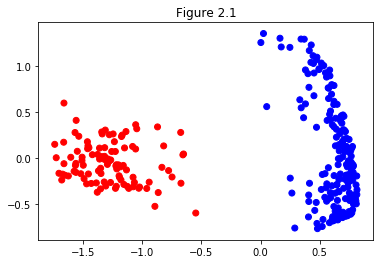

In [125]:
kpca_model = KernelPCA(n_components=2, kernel="poly", fit_inverse_transform=True, degree=3)
kpca_model_full = KernelPCA( kernel="poly", fit_inverse_transform=True, degree=3)

kpca_trans = kpca_model.fit_transform(trainFeatures)
kpca_full_trans = kpca_model_full.fit_transform(trainFeatures)

# Plot results
plt.figure()
plt.title("Figure 2.1")
plt.scatter(kpca_trans[:,0], kpca_trans[:,1], c=colors) #runs through all first column, all second column when run
plt.show()

1a: The features generated from kPCA look to split the data effectively, arguably better than what was used in HW1, which was mean intensity squared and horizontal symmetry.

In [126]:
lambdas = kpca_model.lambdas_
lambdas_full = kpca_model_full.lambdas_
kpca_var = sum(lambdas) / sum(lambdas_full)

print("kPCA Explained Variance:",kpca_var) 
print("HW1  Explained Variance:",np.var(simpleTrain) / np.var(trainFeatures)) #2 features selected from HW1

kPCA Explained Variance: 0.4642628930488372
HW1  Explained Variance: 0.1096824333256313


1b: The kPCA has a larger explained variance. This is expected, because kPCA is based off of maximizing the variance which would then account for more of the variance. This is how it tries to fit the data best. In HW1, we manually chose which two features we would use to separate the data. This can be prone to human error or human bias.

# 2 Logistic Regression

The following C values have been modified beyond C=2 in order to provide a better example of increasing C.

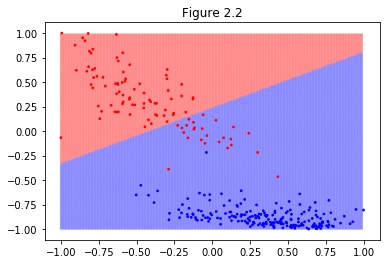

In [134]:
model = LogisticRegression(C=.01,penalty="l2").fit(normTrain, trainDigits)

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
plt.title("Figure 2.2")
show()

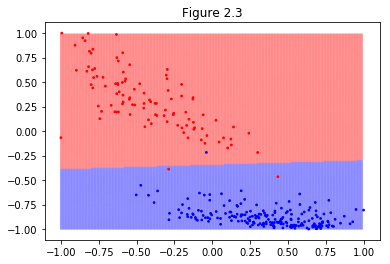

In [136]:
model = LogisticRegression(C=10,penalty="l2").fit(normTrain, trainDigits)

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
plt.title("Figure 2.3")
show()

Graduate Question

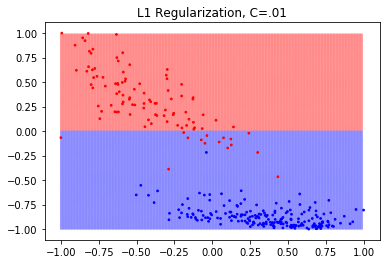

In [137]:
model = LogisticRegression(C=.01,penalty="l1").fit(normTrain, trainDigits)

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
plt.title("L1 Regularization, C=.01")
show()

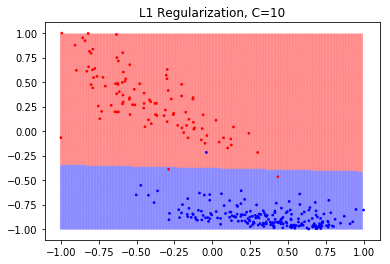

In [138]:
model = LogisticRegression(C=10,penalty="l1").fit(normTrain, trainDigits)

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
plt.title("L1 Regularization, C=10")
show()

To Note: C is the inverse of regularization strength. This means that a lower C is more regularized, while higher C is less regularized.

Both L1 and L2 are meant to regularize and prevent overfitting. L2 looks to square the data and then provide a more smoothed fit to this separated data, while L1 looks for the absolute values. When looking at the logistic regression models above, we can see that for low C values (high regularization), L2 has a more slanted, forgiving separator than L1. Additionally, when looking at where C values increase (decreased regularization), we see that L1 tries to accomodate the incorrect red points more than L2. Because of this, we say that L1 in our case is more likely to overfit the data.

# 3 Support Vector Machines

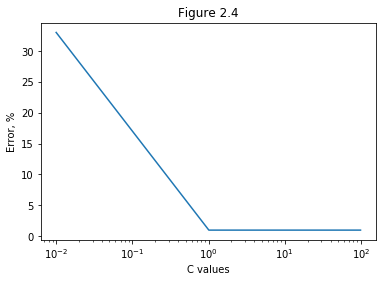

Lowest error at C value: 1.01


In [270]:
xAxis = []
yAxis = []
yErr = 100
iMin = 0

#running this for cross validation of 10
for i in range(1, 10000, 100):
    svc_model = SVC(C=i/100, kernel="linear").fit(simpleTrain, trainDigits)
    accuracy = []
    accuracy = cross_val_score(svc_model, simpleTrain, trainDigits, cv=10)
    xAxis.append(i/100)
    yAxis.append(100*(1-accuracy.mean()))
    
    if (yErr > (100*(1-accuracy.mean()))) :
        yErr = (100*(1-accuracy.mean()))
        iMin = i/100 
    
plt.errorbar(xAxis, yAxis)
plt.xscale("log")
plt.title("Figure 2.4")
plt.xlabel("C values")
plt.ylabel("Error, %")
plt.show()

print("Lowest error at C value:", iMin) 

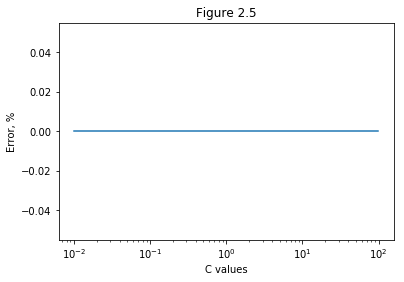

In [87]:
xAxis = []
yAxis = []

#running this for cross validation of 10
for i in range(1, 10000, 100):
    svc_model = SVC(C=i/100, kernel="linear").fit(trainFeatures, trainDigits)
    accuracy = []
    accuracy = cross_val_score(svc_model, trainFeatures, trainDigits, cv=10)
    xAxis.append(i/100)
    yAxis.append(100*(1-accuracy.mean()))
    
plt.errorbar(xAxis, yAxis)
plt.xscale("log")
plt.title("Figure 2.5")
plt.xlabel("C values")
plt.ylabel("Error, %")
plt.show()

From figure 2.4, the C value that first has the lowest cross validation error is when C=1.01. The accuracy is 99.03%.

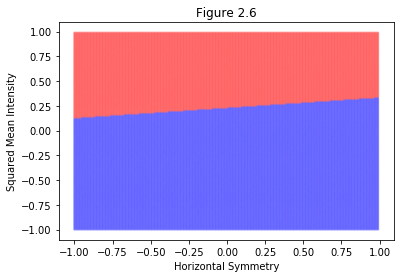

The information above is based on the two picked features from HW1. The C value for the SVC model was determined from figure 2.4.


In [200]:
svc_model = SVC(C=1, kernel="linear").fit(simpleTrain, trainDigits)

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
            
plt.scatter(xPred,yPred,s=2,c=cPred,alpha=.2, )
plt.title("Figure 2.6")
plt.xlabel("Horizontal Symmetry")
plt.ylabel("Squared Mean Intensity")
show()

print("The information above is based on the two picked features from HW1. The C value for the SVC model was determined from figure 2.4.")

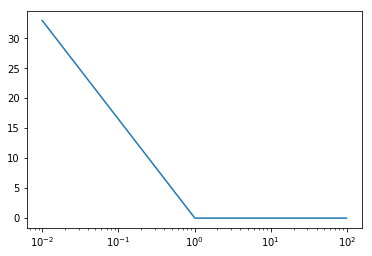

Lowest error at C value: 1.01


In [183]:
#kernel = poly, degree = 2

xAxis = []
yAxis = []
yErr = 100
iMin = 0

#running this for cross validation of 10
for i in range(1, 10000, 100):
    svc_model = SVC(C=i/100, kernel="poly", degree=2).fit(trainFeatures, trainDigits)
    accuracy = []
    accuracy = cross_val_score(svc_model, trainFeatures, trainDigits, cv=10)
    xAxis.append(i/100)
    yAxis.append(100*(1-accuracy.mean()))
    
    if (yErr > (100*(1-accuracy.mean()))) :
        yErr = (100*(1-accuracy.mean()))
        iMin = i/100
    
    
plt.errorbar(xAxis, yAxis)
plt.xscale("log")
plt.show()

print("Lowest error at C value:", iMin) 

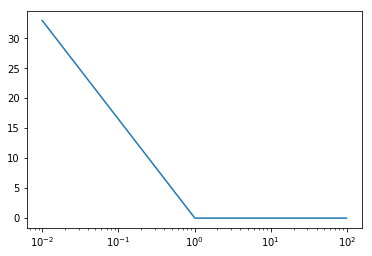

Lowest error at C value: 1.01


In [184]:
#kernel = poly, degree = 5

xAxis = []
yAxis = []
yErr = 100
iMin = 0

#running this for cross validation of 10
for i in range(1, 10000, 100):
    svc_model = SVC(C=i/100, kernel="poly", degree=5).fit(trainFeatures, trainDigits)
    accuracy = []
    accuracy = cross_val_score(svc_model, trainFeatures, trainDigits, cv=10)
    xAxis.append(i/100)
    yAxis.append(100*(1-accuracy.mean()))
    
    if (yErr > (100*(1-accuracy.mean()))) :
        yErr = (100*(1-accuracy.mean()))
        iMin = i/100
    
    
plt.errorbar(xAxis, yAxis)
plt.xscale("log")
plt.show()

print("Lowest error at C value:", iMin) 

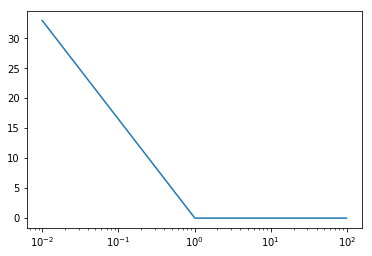

Lowest error at C value: 1.01


In [267]:
#kernel = poly, degree = 10

xAxis = []
yAxis = []
yErr = 100
iMin = 0

#running this for cross validation of 10
for i in range(1, 10000, 100):
    svc_model = SVC(C=i/100, kernel="poly", degree=10).fit(trainFeatures, trainDigits)
    accuracy = []
    accuracy = cross_val_score(svc_model, trainFeatures, trainDigits, cv=10)
    xAxis.append(i/100)
    yAxis.append(100*(1-accuracy.mean()))
    
    if (yErr > (100*(1-accuracy.mean()))) :
        yErr = (100*(1-accuracy.mean()))
        iMin = i/100
    
    
plt.errorbar(xAxis, yAxis)
plt.xscale("log")
# plt.title("Figure 2.5")
# plt.xlabel("C values")
# plt.ylabel("Error, %")
plt.show()

print("Lowest error at C value:", iMin) 

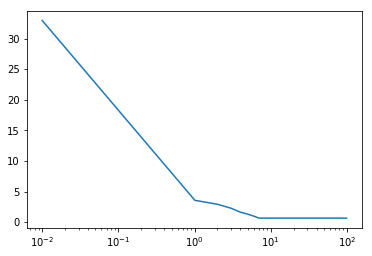

Lowest error at C value: 7.01


In [185]:
#kernel = poly, degree = 20

xAxis = []
yAxis = []
yErr = 100
iMin = 0

#running this for cross validation of 10
for i in range(1, 10000, 100):
    svc_model = SVC(C=i/100, kernel="poly", degree=20).fit(trainFeatures, trainDigits)
    accuracy = []
    accuracy = cross_val_score(svc_model, trainFeatures, trainDigits, cv=10)
    xAxis.append(i/100)
    yAxis.append(100*(1-accuracy.mean()))
    
    if (yErr > (100*(1-accuracy.mean()))) :
        yErr = (100*(1-accuracy.mean()))
        iMin = i/100
    
    
plt.errorbar(xAxis, yAxis)
plt.xscale("log")
plt.show()

print("Lowest error at C value:", iMin) 

As we increase C, we are decreasing the percentage error, thus being more prone to overfit. By increasing the degree, it looks like we are shifting at what point we have the lowest error. Because of this, the relationship seems to be that as we increase the polynomial degree, we will tend to overfit less at the same C values, and that higher C values will incline us to be overfit.

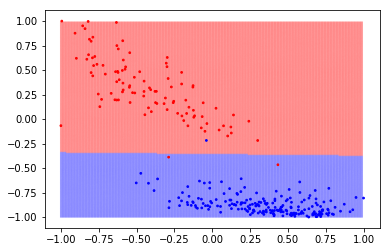

In [221]:
#kernel = poly, degree = 1
svc_model = SVC(C=1, kernel="poly", degree=1).fit(normTrain, trainDigits)    

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
show()

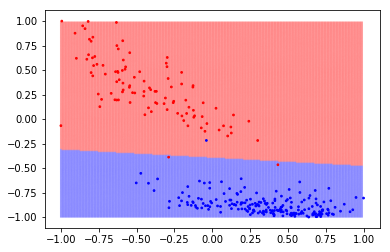

In [230]:
#kernel = poly, degree = 1
svc_model = SVC(C=100, kernel="poly", degree=1).fit(normTrain, trainDigits)    

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
show()

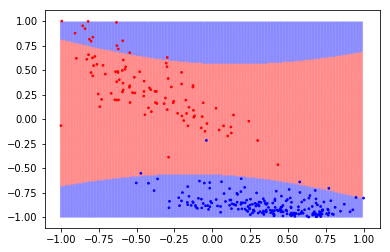

In [222]:
#kernel = poly, degree = 2
svc_model = SVC(C=1, kernel="poly", degree=2).fit(normTrain, trainDigits)    

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
show()

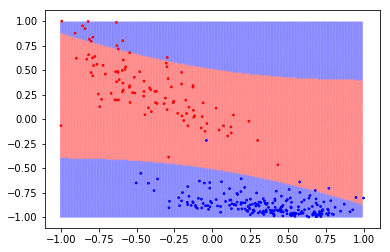

In [226]:
#kernel = poly, degree = 2
svc_model = SVC(C=100, kernel="poly", degree=2).fit(normTrain, trainDigits)    

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
show()

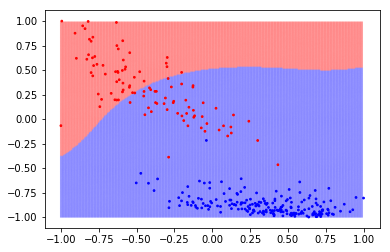

In [227]:
#kernel = poly, degree = 5
svc_model = SVC(C=1, kernel="poly", degree=5).fit(normTrain, trainDigits)    

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
show()

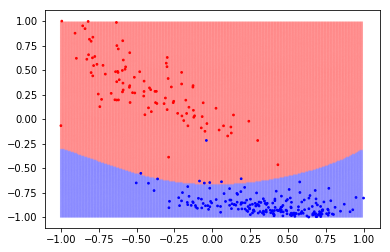

In [228]:
#kernel = poly, degree = 5
svc_model = SVC(C=100, kernel="poly", degree=5).fit(normTrain, trainDigits)    

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
show()

Above are graphs of decision regions with the underlying scatter plot. The graphs represent degree=1,2,5 with C=1,100. We can see that as we increase the degree, we create a more flexible distinction between red and blue than just a linear separator. However, when looking at the actual data, we see that we have clearly linearly separable data and so having a skewed separator has a detrimental effect since it misclassifies more data. Because of this, we choose degree=1 as our best fit degree.

When looking at degree=1, we can see that as we increase C, we decrease the margin between the hyperplane and its support vectors. This tightness can potentially lead to eventual overfitting when comparing the training data to our testing data. Because of this, we leave c=1 since it provides more room for error in our training model.

Graduate Question

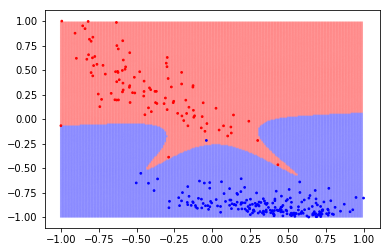

0.0


In [252]:
#This represents an overfit graph
svc_model = SVC(C=100000000000, kernel="poly", degree=5).fit(normTrain, trainDigits)  

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

accuracy = []
accuracy = cross_val_score(svc_model, trainFeatures, trainDigits, cv=10)
error = 100*(1-accuracy.mean())
            
plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
show()

print(error)

In the above chart, we have a very high C with degree=5. This is grossly overfit from the image above, as we can see some strong formation and rejection of the decision region where there are red dots. The only outlier in the training set is the one blue point in the red region, but the blue region is skewed heavily towards it to compensate. A high C was chosen because we determined that an increase in C allows for tigher classification and lower room for error, while degree was chosen at a low value to keep us from balancing out an increased C value. This resulted in 0% error.

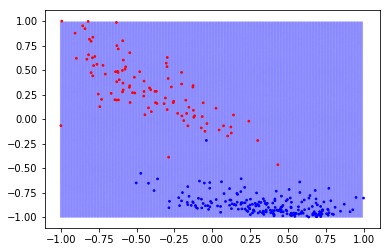

33.000672043010745


In [268]:
#This represents an underfit graph
svc_model3 = SVC(C=.01, kernel="poly", degree=20).fit(normTrain, trainDigits)  

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model3.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

accuracy = []
accuracy = cross_val_score(svc_model3, trainFeatures, trainDigits, cv=10)
error = 100*(1-accuracy.mean())
            
plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
show()

print(error)

In the above chart, we have a low C with high degree=20. From the above, we see that everything is considered blue, which is a large error in consideration of the training set. This correlates to a 33% error. This is considered underfit, as we do not fit the training data well at all and see it all as blue. A low C was chosen since we recognized that a lower C indicates that we are more generous with misclassification, while a higher degree may give us a lower fit as well.

# Extra Credit

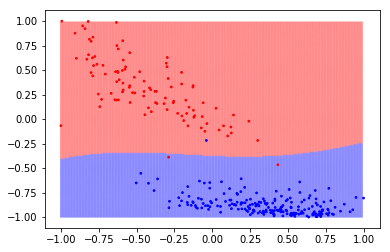

In [284]:
svc_model = SVC(C=1, kernel="rbf", degree=2, gamma=1).fit(normTrain, trainDigits)  

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

accuracy = []
accuracy = cross_val_score(svc_model, trainFeatures, trainDigits, cv=10)
error = 100*(1-accuracy.mean())
            
plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
show()

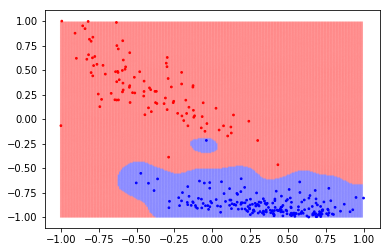

In [285]:
svc_model = SVC(C=1, kernel="rbf", degree=2, gamma=100).fit(normTrain, trainDigits)  

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

accuracy = []
accuracy = cross_val_score(svc_model, trainFeatures, trainDigits, cv=10)
error = 100*(1-accuracy.mean())
            
plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
show()

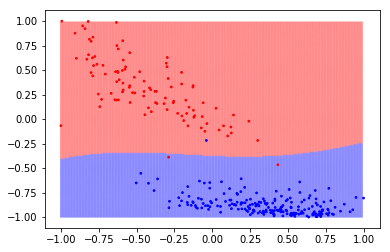

In [286]:
svc_model = SVC(C=1, kernel="rbf", degree=5, gamma=1).fit(normTrain, trainDigits)  

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

accuracy = []
accuracy = cross_val_score(svc_model, trainFeatures, trainDigits, cv=10)
error = 100*(1-accuracy.mean())
            
plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
show()

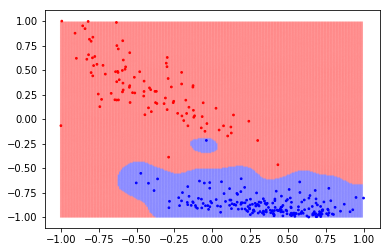

In [287]:
svc_model = SVC(C=1, kernel="rbf", degree=5, gamma=100).fit(normTrain, trainDigits)  

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

accuracy = []
accuracy = cross_val_score(svc_model, trainFeatures, trainDigits, cv=10)
error = 100*(1-accuracy.mean())
            
plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
show()

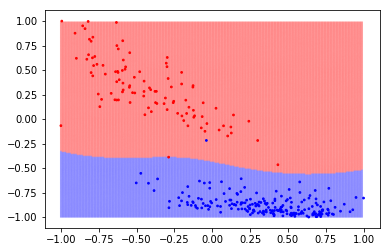

In [288]:
svc_model = SVC(C=100, kernel="rbf", degree=5, gamma=1).fit(normTrain, trainDigits)  

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

accuracy = []
accuracy = cross_val_score(svc_model, trainFeatures, trainDigits, cv=10)
error = 100*(1-accuracy.mean())
            
plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
show()

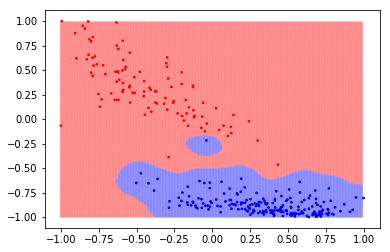

In [289]:
svc_model = SVC(C=100, kernel="rbf", degree=5, gamma=100).fit(normTrain, trainDigits)  

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(svc_model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

accuracy = []
accuracy = cross_val_score(svc_model, trainFeatures, trainDigits, cv=10)
error = 100*(1-accuracy.mean())
            
plt.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
plt.scatter(normX,normY,s=3,c=colors)
show()

Poly was excluded and only rbf testing was conducted. This is because when running Poly tests, a degree of 7+ with an increasing gamma introduced a very large runtime, not completing in any reasonable amount of time. For this reason, we have only run tests on rbf for testing the effects of gamma.

We ran tests involving rbf as our kernel. When increasing gamma with a small degree and C, we saw that the decision region became more attuned to individual points. 

We then ran tests where we increased the degree and ran from a low gamma to a high gamma. Again, we saw that gamma played a similar effect, and that the individual blue point had a blue region instead of being misclassified.

Finally, we ran tests where we increased the C and increased gamma. The same effect played out, where our decision region tried to misclassify as little data as possible.

Because of the tests run above, we infer that as gamma increases, we would expect a higher level of overfitting.

In [7]:
hw1data = np.loadtxt("data.csv")

#shuffle the data and select training and test data
np.random.seed(100)
np.random.shuffle(data)

features = []
digits = []

for row in data:
    if(row[0]==1 or row[0]==5):
        features.append(row[1:]) #add in remaining values past the first (this is a matrix)
        digits.append(str(row[0])) #add the 1 or the 5 to digits

#select the proportion of data to use for training
numTrain = int(len(features)*.2) #we are training on 20% of the data

trainFeatures = features[:numTrain] #we train on the first 20% of the data
testFeatures = features[numTrain:]  #we test on the remaining 80%
trainDigits = digits[:numTrain]     #we train on the first 20% of the data
testDigits = digits[numTrain:]      #we test on the remaining 80%

hw1X = []
hw1Y = []
simpleTrain = []
colors = []
for index in range(len(trainFeatures)):
    hw1X.append((sum(trainFeatures[index])/256)**2) #mean intensity squared
    hw1Y.append(sum((trainFeatures[index][:128]- trainFeatures[index][128:])**2)/256) #horiz symmetry
#     simpleTrain.append([(sum(trainFeatures[index])/256)**2,sum((trainFeatures[index][:128]- trainFeatures[index][128:])**2)/256])
#     if(trainDigits[index]=="1.0"): #if the digit is 1, it is blue. else, it is red (only 1's and 5's)
#         colors.append("b")
#     else:
#         colors.append("r")
# #normalization of X and Y
# normX = [2*((i - min(hw1X)) / (max(hw1X) - min(hw1X)))-1 for i in hw1X]
# normY = [2*((i - min(hw1Y)) / (max(hw1Y) - min(hw1Y)))-1 for i in hw1Y]